# Analysis and implementation of Data Model

In [1]:
#Importing all of the necessary modules
import numpy as np
import csv
import pandas as pd
from matplotlib import pyplot as plt
import sklearn.metrics as metrics
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge 
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv('concreteData.csv')
data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.99000
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.89000
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270.0,40.27000
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365.0,41.05000
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0,44.30000
...,...,...,...,...,...,...,...,...,...
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28.0,32.40000
1030,7.0,4.0,3.0,3.0,6.0,5.0,3.0,3.0,12.29680
1031,9.0,9.0,9.0,99.0,9.0,9.0,9.0,9.0,24.59004
1032,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,12.73510


In [4]:
#Created a list with all of the column names we wanted and renamed all of the current dataset column names because they were too long
req_col_names = ["Cement", "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer",
                 "CoarseAggregate", "FineAggregate", "Age", "CC_Strength"]
curr_col_names = list(data.columns)

mapper = {}
for i, name in enumerate(curr_col_names):
    mapper[name] = req_col_names[i]

data = data.rename(columns=mapper)
#Used Naga Sai Pranay Modukuru's code from https://www.kaggle.com/pranaymns/predicting-concrete-compressive-strength-with-ml/notebook

In [5]:
#Checking to see if there are null values
data.isna().sum()

Cement              0
BlastFurnaceSlag    0
FlyAsh              0
Water               0
Superplasticizer    0
CoarseAggregate     0
FineAggregate       0
Age                 0
CC_Strength         0
dtype: int64

In [7]:
data.describe()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CC_Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


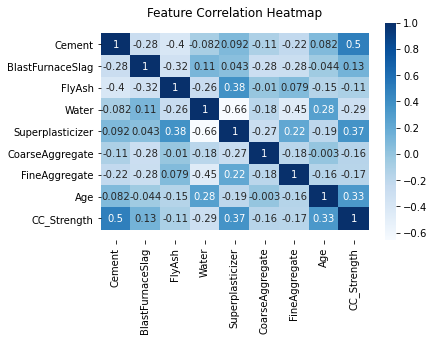

In [8]:
# used data.corr() to make a heatmap of the feature correlations to get a better understanding of how the features affect the CC Strength
corr = data.corr()

sns.heatmap(corr, annot=True, cmap='Blues')
b, t = plt.ylim()
plt.ylim(b+0.5, t-0.5)
plt.title("Feature Correlation Heatmap")
plt.show()
#Used Naga Sai Pranay Modukuru's code from https://www.kaggle.com/pranaymns/predicting-concrete-compressive-strength-with-ml/notebook

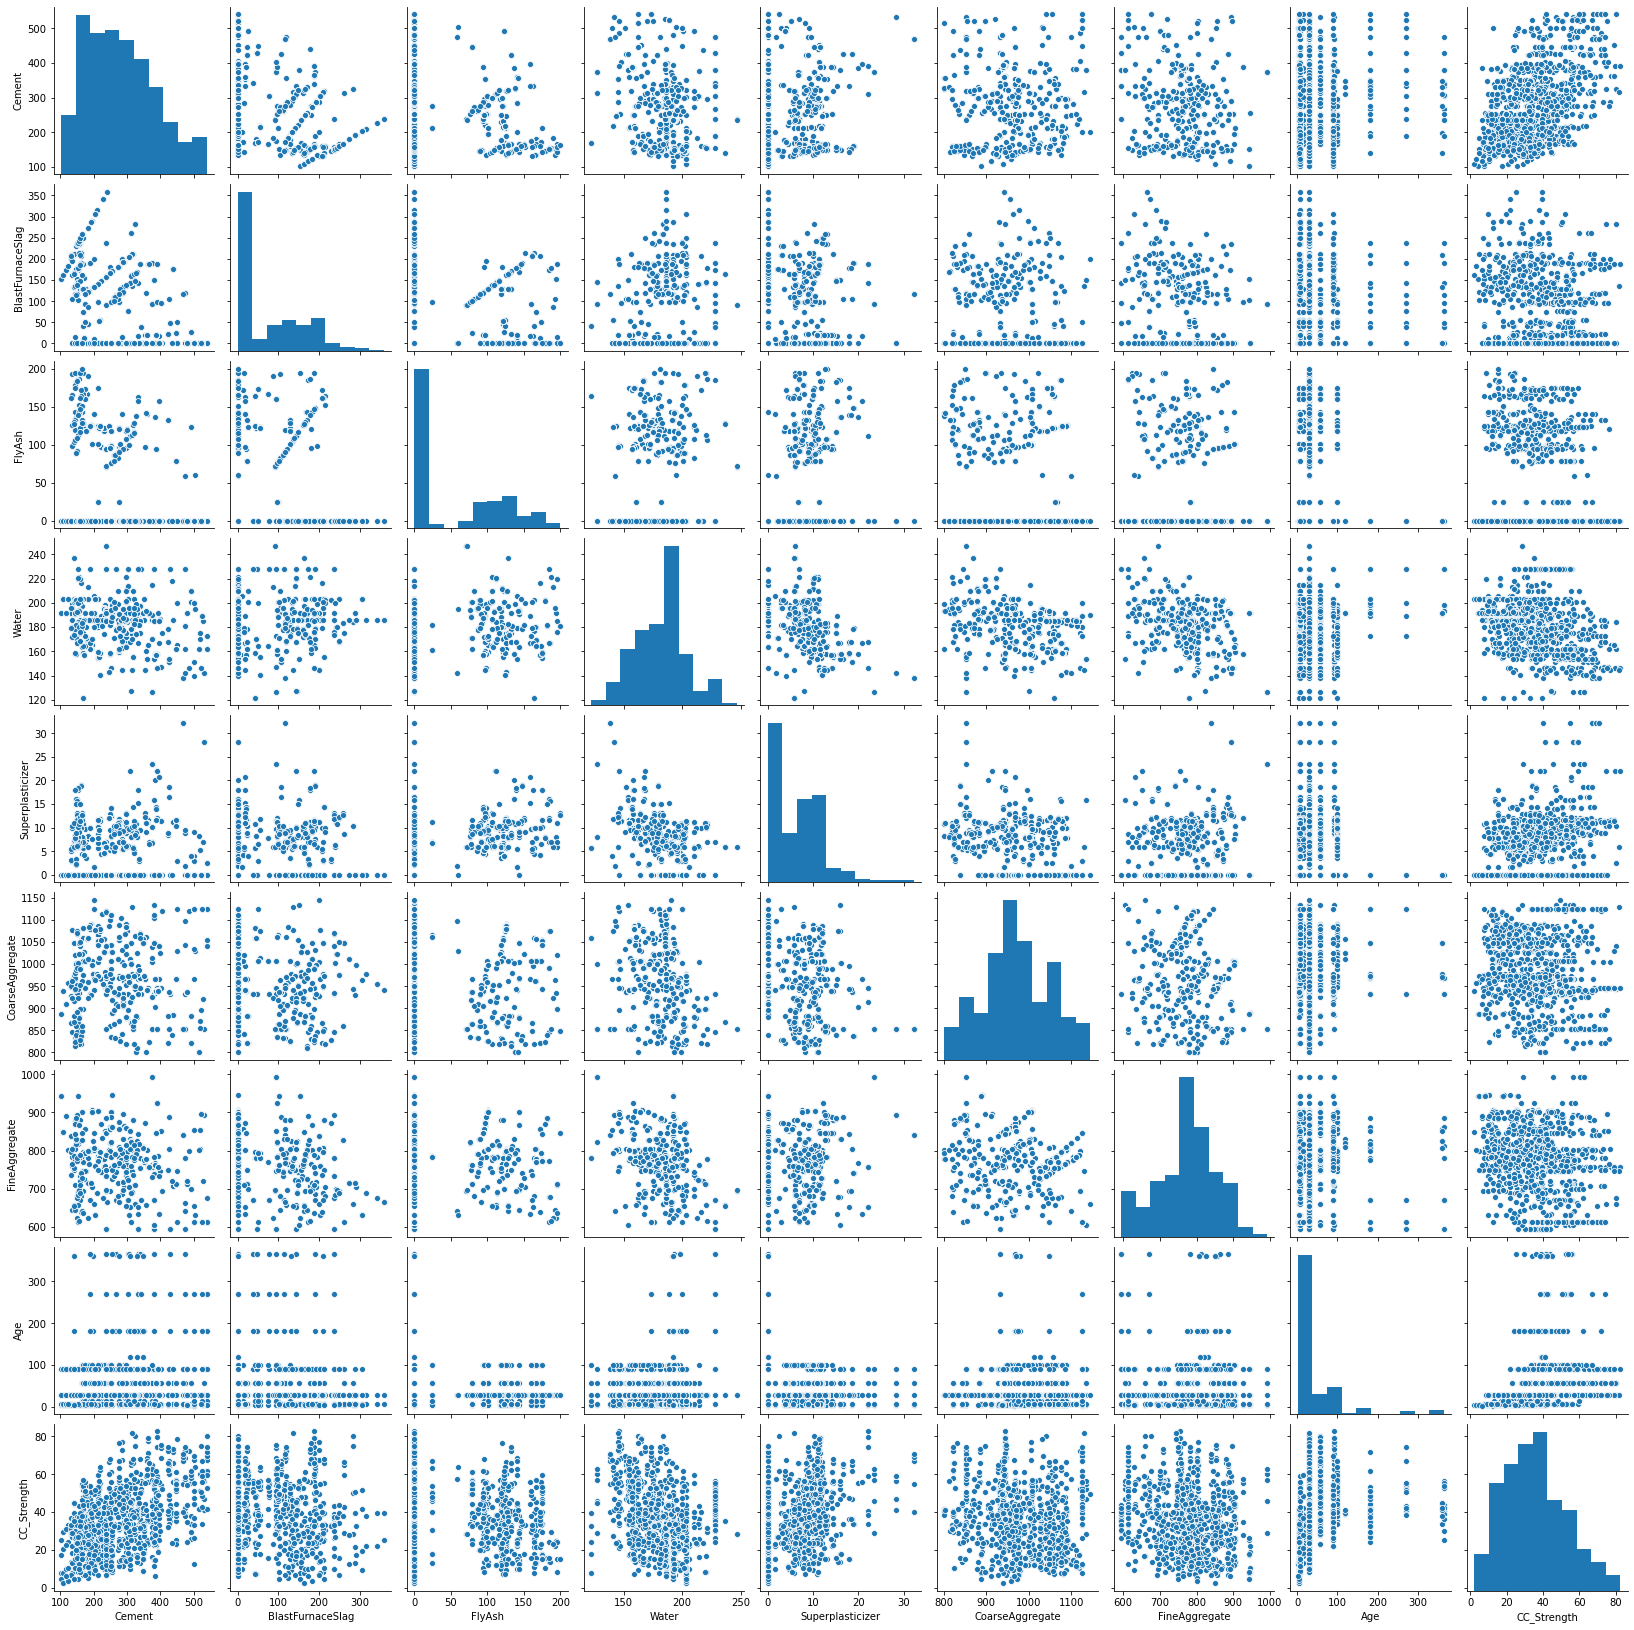

In [9]:
#Made a pairplot of the data to check the pairwise relations of the features
sns.pairplot(data)
plt.show()

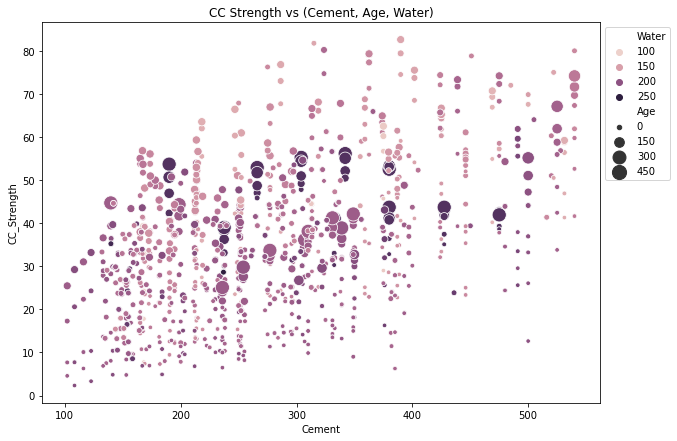

In [10]:
#What we found from the plot below was that CC Strength increases with amount of cement.
#CC Strength increases with age.
#lower age cement needs more quantity for higher strength.
#The older the cement is the more water it requires.
#CC Strength increases when less water is used.
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(y="CC_Strength", x="Cement", hue="Water", size="Age", data=data, ax=ax, sizes=(20, 200))
ax.set_title("CC Strength vs (Cement, Age, Water)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()
#Used Naga Sai Pranay Modukuru's code from https://www.kaggle.com/pranaymns/predicting-concrete-compressive-strength-with-ml/notebook

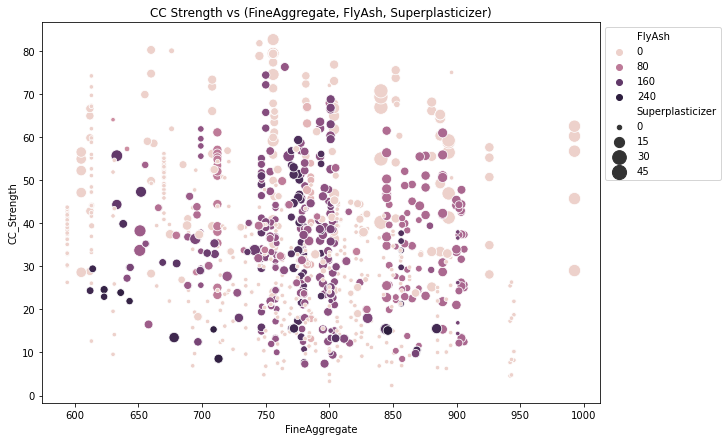

In [34]:
#What we found from the plot below was that as CC Strength decreases,FlyAsh increases.
#And that CC Strength increases as Superplasticizer increases
Compressive strength increases with Superplasticizer since larger the dot the higher they are in the plot.
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(y="CC_Strength", x="FineAggregate", hue="FlyAsh", size="Superplasticizer", data=data, ax=ax, sizes=(20, 200))
ax.set_title("CC Strength vs (FineAggregate, FlyAsh, Superplasticizer)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()
#Used Naga Sai Pranay Modukuru's code from https://towardsdatascience.com/concrete-compressive-strength-prediction-using-machine-learning-4a531b3c43f3


In [12]:
#Separating Input Features and Target Variable
X = data.iloc[:,:-1]        
y = data.iloc[:,-1]          
#Splitting data into Training and Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2) 
#Standardizing the data to rescale the features to have a mean of zero and SD of 1.
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)
#Used Naga Sai Pranay Modukuru's code from https://www.kaggle.com/pranaymns/predicting-concrete-compressive-strength-with-ml/notebook

In [13]:
#Model building with Linear, Lasso and Ridge regression
#Training Machine Learning Algorithms on the training data and making predictions on Test data.

# Linear Regression 
lr = LinearRegression() 
# Lasso Regression 
lasso = Lasso() 
# Ridge Regression 
ridge = Ridge() 
# Fitting models on Training data 
lr.fit(X_train, y_train) 
lasso.fit(X_train, y_train) 
ridge.fit(X_train, y_train) 
# Making predictions on Test data 
y_pred_lr = lr.predict(X_test) 
y_pred_lasso = lasso.predict(X_test) 
y_pred_ridge = ridge.predict(X_test) 

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
print("Model\t\t\t RMSE \t\t R2") 
print("""LinearRegression \t {:.2f} \t\t{:.2f}""".format(  np.sqrt(mean_squared_error(y_test, y_pred_lr)), r2_score(y_test, y_pred_lr))) 
print("""LassoRegression \t {:.2f} \t\t{:.2f}""".format( np.sqrt(mean_squared_error(y_test, y_pred_lasso)), r2_score(y_test, y_pred_lasso))) 
print("""RidgeRegression \t {:.2f} \t\t{:.2f}""".format( np.sqrt(mean_squared_error(y_test, y_pred_ridge)), r2_score(y_test, y_pred_ridge)))
#Used Naga Sai Pranay Modukuru's code from https://www.kaggle.com/pranaymns/predicting-concrete-compressive-strength-with-ml/notebook

Model			 RMSE 		 R2
LinearRegression 	 10.42 		0.59
LassoRegression 	 10.96 		0.55
RidgeRegression 	 10.42 		0.59


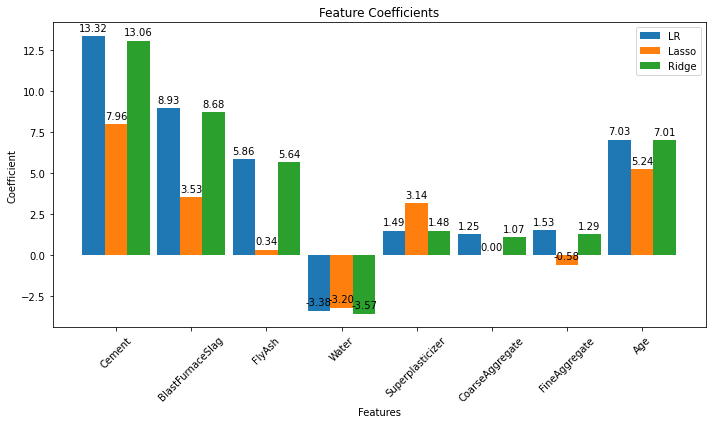

In [14]:
#Making a plot of the feature coefficients to compare the models
coeff_lr = lr.coef_
coeff_lasso = lasso.coef_
coeff_ridge = ridge.coef_

labels = req_col_names[:-1]

x = np.arange(len(labels)) 
width = 0.3

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - 2*(width/2), coeff_lr, width, label='LR')
rects2 = ax.bar(x, coeff_lasso, width, label='Lasso')
rects3 = ax.bar(x + 2*(width/2), coeff_ridge, width, label='Ridge')

ax.set_ylabel('Coefficient')
ax.set_xlabel('Features')
ax.set_title('Feature Coefficients')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()
#Used Naga Sai Pranay Modukuru's code from https://www.kaggle.com/pranaymns/predicting-concrete-compressive-strength-with-ml/notebook

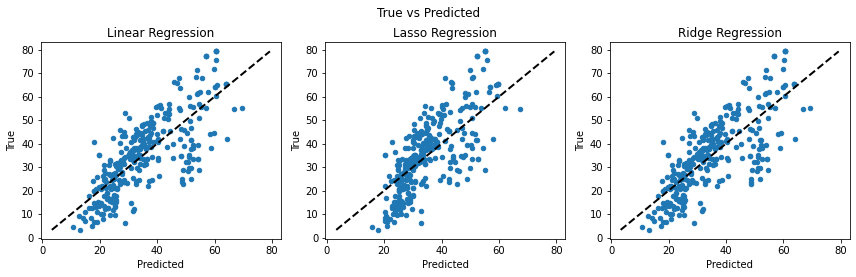

In [15]:
# Plotting the Predicted vs True values of target variable to make conclusions about the models
#We found that Linear and Ridge Regression perform well as the predictions are closer to the actual values while Lasso Regression has a bit worst performance
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4))

ax1.scatter(y_pred_lr, y_test, s=20)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax1.set_ylabel("True")
ax1.set_xlabel("Predicted")
ax1.set_title("Linear Regression")

ax2.scatter(y_pred_lasso, y_test, s=20)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax2.set_ylabel("True")
ax2.set_xlabel("Predicted")
ax2.set_title("Lasso Regression")

ax3.scatter(y_pred_ridge, y_test, s=20)
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax3.set_ylabel("True")
ax3.set_xlabel("Predicted")
ax3.set_title("Ridge Regression")

fig.suptitle("True vs Predicted")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
#Used Naga Sai Pranay Modukuru's code from https://www.kaggle.com/pranaymns/predicting-concrete-compressive-strength-with-ml/notebook

Model				 RMSE 		 R2
Decision Tree Regressor 	 7.03 		0.81


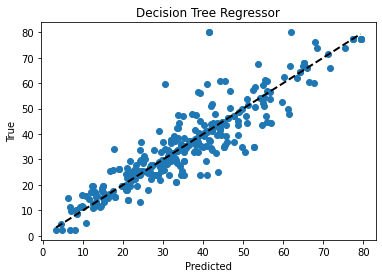

In [16]:
# Plotting the Predicted vs True values of target variable for a decision tree regressor to see how it does
# We found that the RMSE lowered to around 7 which means our performance improved by a lot
from sklearn.tree import DecisionTreeRegressor 
dtr = DecisionTreeRegressor() 
dtr.fit(X_train, y_train) 
y_pred_dtr = dtr.predict(X_test) 
print("Model\t\t\t\t RMSE \t\t R2") 
print("""Decision Tree Regressor \t {:.2f} \t\t{:.2f}""".format( np.sqrt(mean_squared_error(y_test, y_pred_dtr)), r2_score(y_test, y_pred_dtr))) 
plt.scatter(y_test, y_pred_dtr) 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
plt.xlabel("Predicted") 
plt.ylabel("True") 
plt.title("Decision Tree Regressor") 
plt.show()
#Used Naga Sai Pranay Modukuru's code from https://www.kaggle.com/pranaymns/predicting-concrete-compressive-strength-with-ml/notebook

Model				 RMSE 		 R2
Random Forest Regressor 	 4.90 		0.91


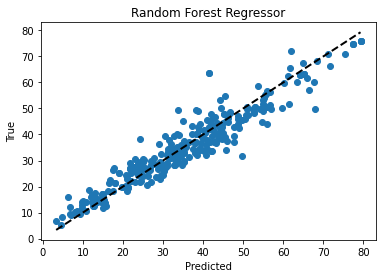

In [17]:
#Doing the same thing here but with the Random Forest Regressor
# We found that with this regressor the RMSE lowered even more to around 4.9 which is even better performance
from sklearn.ensemble import RandomForestRegressor 
rfr = RandomForestRegressor(n_estimators=100) 
rfr.fit(X_train, y_train) 
y_pred_rfr = rfr.predict(X_test) 
print("Model\t\t\t\t RMSE \t\t R2") 
print("""Random Forest Regressor \t {:.2f} \t\t{:.2f}""".format( np.sqrt(mean_squared_error(y_test, y_pred_rfr)), r2_score(y_test, y_pred_rfr))) 
plt.scatter(y_test, y_pred_rfr) 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
plt.xlabel("Predicted") 
plt.ylabel("True") 
plt.title("Random Forest Regressor") 
plt.show()
#Used Naga Sai Pranay Modukuru's code from https://www.kaggle.com/pranaymns/predicting-concrete-compressive-strength-with-ml/notebook

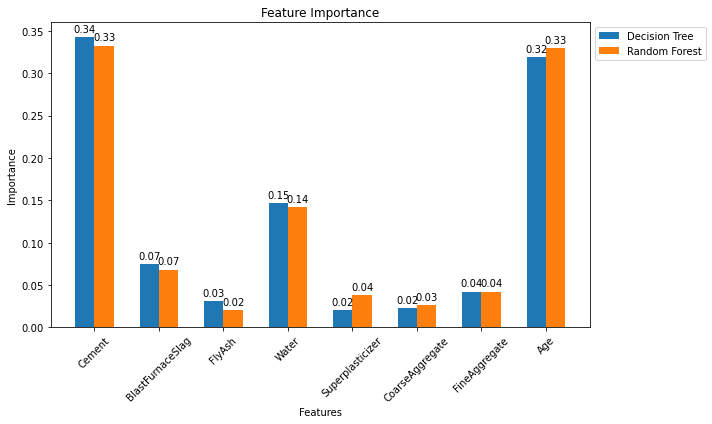

In [18]:
# Making a Feature importance plot to visualize which features have the most influence in prediction CC Strength with either 
# Decision Tree regressor or Random Forest regressor 
# We found that Cement and Age are the most important features,while Fly ash, Coarse and Fine aggregates are the least important features.
feature_dtr = dtr.feature_importances_ 
feature_rfr = rfr.feature_importances_ 
labels = req_col_names[:-1] 
x = np.arange(len(labels)) 
width = 0.3 
fig, ax = plt.subplots(figsize=(10,6)) 
rects1 = ax.bar(x-(width/2), feature_dtr, width, label='Decision Tree') 
rects2 = ax.bar(x+(width/2), feature_rfr, width, label='Random Forest') 
ax.set_ylabel('Importance') 
ax.set_xlabel('Features') 
ax.set_title('Feature Importance') 
ax.set_xticks(x) 
ax.set_xticklabels(labels, rotation=45) 
ax.legend(loc="upper left", bbox_to_anchor=(1,1)) 
autolabel(rects1) 
autolabel(rects2) 
fig.tight_layout() 
plt.show()
#Used Naga Sai Pranay Modukuru's code from https://www.kaggle.com/pranaymns/predicting-concrete-compressive-strength-with-ml/notebook

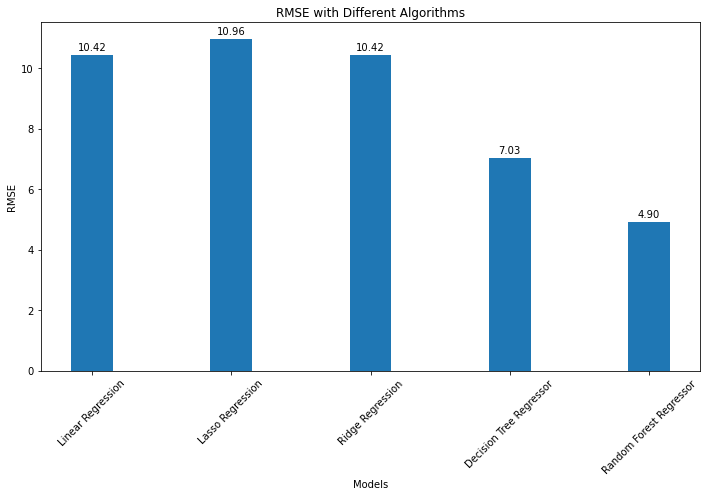

In [19]:
#Final comparison of the RMSE values for the different algorithms which led us to our conclusion that the Random Forest Regressor was the best model in this case
models = [lr, lasso, ridge, dtr, rfr] 
names = ["Linear Regression", "Lasso Regression", "Ridge Regression", "Decision Tree Regressor", "Random Forest Regressor"] 
rmses = [] 
for model in models: 
   rmses.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test)))) 
x = np.arange(len(names)) 
width = 0.3 
fig, ax = plt.subplots(figsize=(10,7)) 
rects = ax.bar(x, rmses, width) 
ax.set_ylabel('RMSE') 
ax.set_xlabel('Models') 
ax.set_title('RMSE with Different Algorithms') 
ax.set_xticks(x) 
ax.set_xticklabels(names, rotation=45) 
autolabel(rects) 
fig.tight_layout() 
plt.show()
#Used Naga Sai Pranay Modukuru's code from https://www.kaggle.com/pranaymns/predicting-concrete-compressive-strength-with-ml/notebook

# Implementation for the data model user interface.

In [39]:
# Now that we have concluded which is the best model, we used the random forest regressor to predic CC Strength from the 5 given rows on the project background notebook

predictors = ["Cement", "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer",
                 "CoarseAggregate", "FineAggregate", "Age"]
X = data[predictors]
y = data["CC_Strength"]

RFR =  RandomForestRegressor()
model = RFR.fit(X, y)
new_X = [[175.0, 13.0,172.0,156.0,4.0,1000.0,856.0,3.0]]
print(model.predict(new_X))
new_X = [[320.0, 0.0,0.0,970.0,850.0,192.0,0.0,7.0]]
print(model.predict(new_X))
new_X = [[320.0, 0.0,126.0,860.0,856.0,209.0,5.70,28.0]]
print(model.predict(new_X))
new_X = [[320.0, 73.0,54.0,972.0,773.0,181.0,6.0,45.0]]
print(model.predict(new_X))
new_X = [[530.0, 359.0,200.0,1145.0,992.0,247.0,32.0,365.0]]
print(model.predict(new_X))



[18.603]
[35.7026]
[38.3287]
[48.505425]
[67.0626]


In [8]:
#Here we ask the user to add the custom inputs and then we use the concreteData and random forest regressor to predict the CC Strength
#All of that data is later added to a new dictionary
Cementinput = float(input('\nEnter Cement value'))
BFSinput = float(input('\nEnter Blast Furnace Slag value'))
FlyAshinput = float(input('\nEnter Fly Ash value'))
Waterinput = float(input('\nEnter Water value'))
Superplasticizerinput = float(input('\nEnter Superplasticizer value'))
CoarseAggregateinput = float(input('\nEnter Coarse Aggregate value'))
FineAggregateinput = float(input('\nEnter Fine Aggregate value'))
Ageinput = float(input('\nEnter Age value'))
        

predictors = ["Cement", "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer","CoarseAggregate", "FineAggregate", "Age"]
X = data[predictors]
y = data["CC_Strength"]
RFR =  RandomForestRegressor()
model = RFR.fit(X, y)
new_X = [[Cementinput, BFSinput,FlyAshinput,Waterinput,Superplasticizerinput,CoarseAggregateinput,FineAggregateinput,Ageinput]]
CC_predicted = float(model.predict(new_X))
        

        


Enter Cement value 1

Enter Blast Furnace Slag value 1

Enter Fly Ash value 1

Enter Water value 1

Enter Superplasticizer value 1

Enter Coarse Aggregate value 1

Enter Fine Aggregate value 23

Enter Age value 1


# Implementation for the database update interface.

In [13]:
#Here we use that dictionary to ask the user whether or not they want to add their predictions to the excel file
my_dict = {'Cement':float(Cementinput),'BlastFurnaceSlag':float(BFSinput),'FlyAsh': (FlyAshinput),
                    'CoarseAggregate':float(CoarseAggregateinput),'FineAggregate':float(FineAggregateinput),'Water':float(Waterinput),
                    'Superplasticizer':float(Superplasticizerinput),'Age':float(Ageinput),'CC_Strength':float(CC_predicted)}
        
Add_to_Excel = str(input("Would you like to add this to the excel?"))
if Add_to_Excel[0] == "Y":
    with open('concreteData.csv','a') as f:
        w = csv.writer(f)
        w.writerow(my_dict.values())
    print("\nThe Predicted CC Strenfth for the input values is "+str(CC_predicted))
    print('\nThe numbers you input and the prediction have been added to the Excel file')
elif Add_to_Excel[0] == "y":
    with open('concreteData.csv','a') as f:
        w = csv.writer(f)
        w.writerow(my_dict.values())
    print("\nThe Predicted CC Strenfth for the input values is "+str(CC_predicted))
    print('\nThe numbers you input and the prediction have been added to the Excel file')
else:
    print("\nThe Predicted CC Strenfth for the input values is "+str(CC_predicted))
    

Would you like to add this to the excel? yes



The Predicted CC Strenfth for the input values is 11.625137000000006

The numbers you input and prediction has been added to the Excel file


Sources Used
https://www.kaggle.com/pranaymns/predicting-concrete-compressive-strength-with-ml/notebook by Naga Sai Pranay Modukuru
https://towardsdatascience.com/concrete-compressive-strength-prediction-using-machine-learning-4a531b3c43f3 by Naga Sai Pranay Modukuru